# Group A: Machine Learning
## Assignment 3

### Classification

In [132]:
import numpy as np # for Numeric Operations
import pandas as pd # For Dataframe Operations
import matplotlib.pyplot as plt # For Plotting and Visualization
import seaborn as sns

In [133]:
df = pd.read_csv("Admission_Predict.csv")

In [134]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [135]:
df.shape

(400, 9)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [137]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [138]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [139]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [140]:
# df.drop(columns=['Serial No.'],axis=1,inplace=True
df.columns = df.columns.str.strip()
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [141]:
df['Chance of Admit'] = [np.round(i) for i in df['Chance of Admit']]

df.head()


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1              1.0  
1         1              1.0  
2         1              1.0  
3         1              1.0  
4         0              1.0

In [142]:
df.skew()

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -2.930670
dtype: float64

<Axes: xlabel='GRE Score', ylabel='Count'>

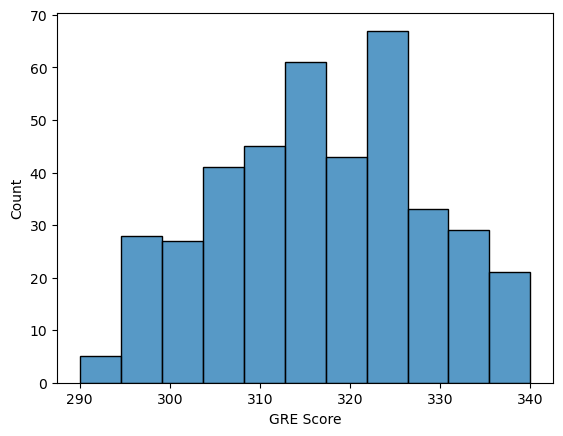

In [143]:
sns.histplot(x=df['GRE Score'])

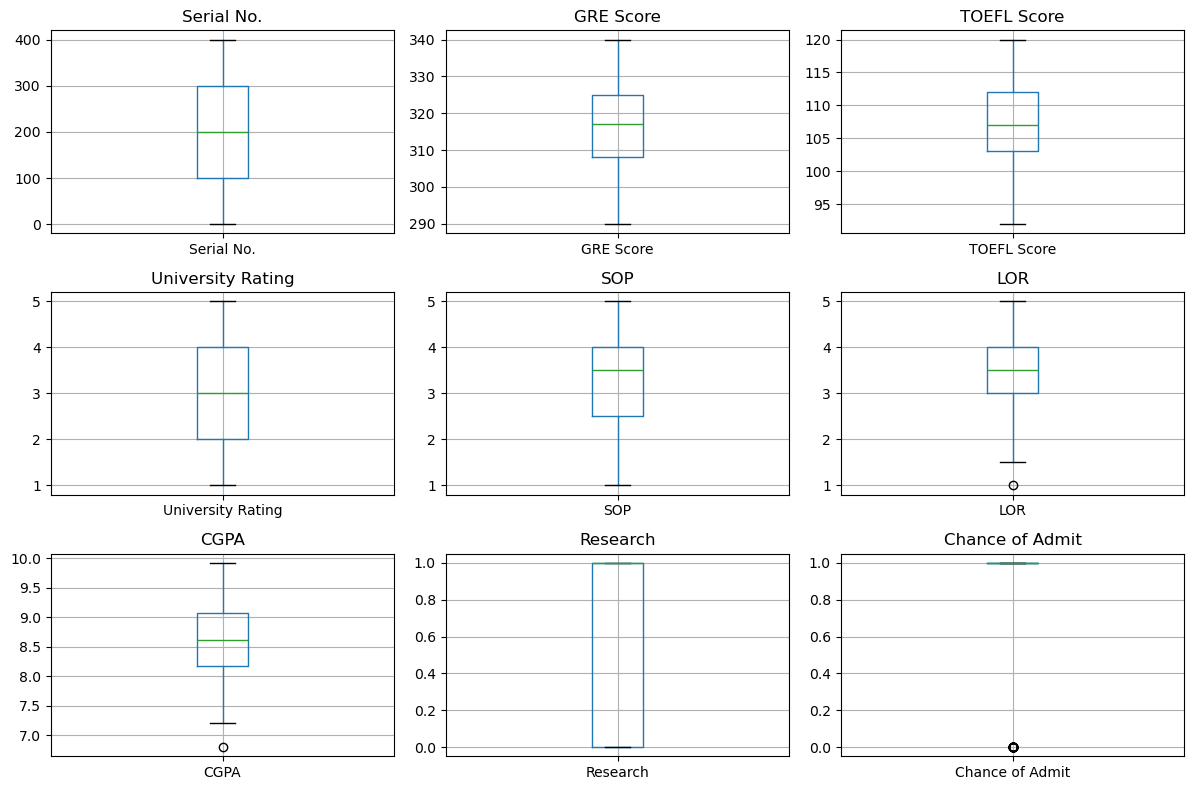

In [144]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()


In [145]:
df['Chance of Admit'].value_counts()

Chance of Admit
1.0    365
0.0     35
Name: count, dtype: int64

<Axes: xlabel='Chance of Admit'>

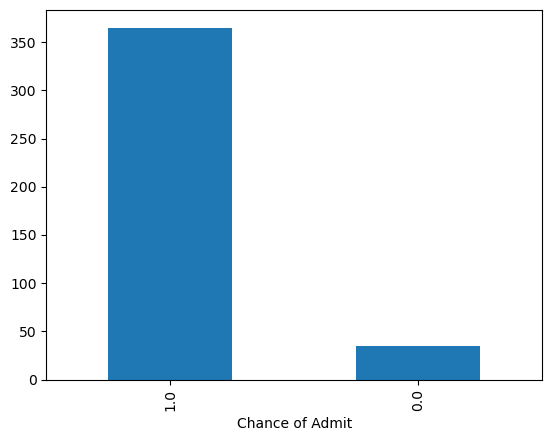

In [146]:
df['Chance of Admit'].value_counts().plot(kind='bar')

<Axes: xlabel='Chance of Admit', ylabel='count'>

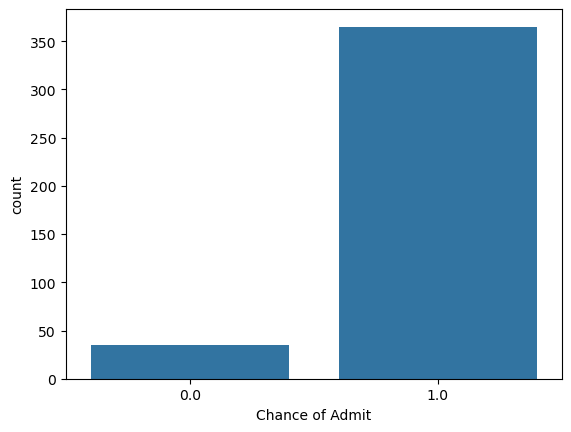

In [147]:
sns.countplot(x=df['Chance of Admit'])

In [148]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [149]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_sampled, y_sampled = oversample.fit_resample(X, y)


In [150]:
X_sampled.shape

(730, 8)

In [151]:
y_sampled.shape

(730,)

<Axes: ylabel='count'>

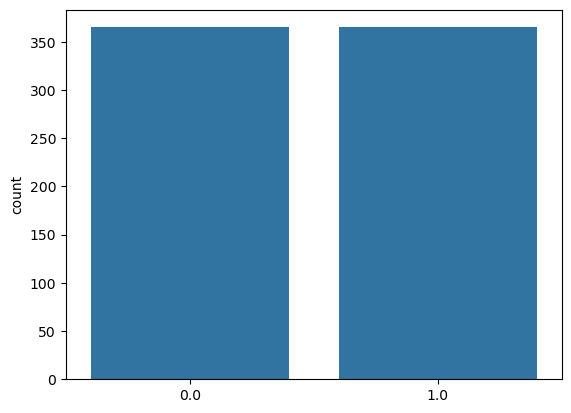

In [152]:
sns.countplot(x=y_sampled)

<Axes: ylabel='count'>

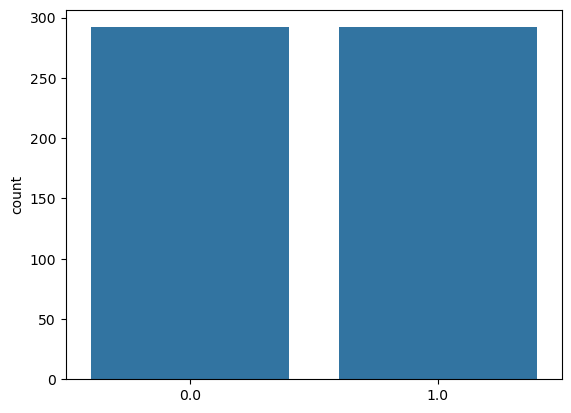

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, train_size=0.8,
    random_state=42, stratify=y_sampled
)

sns.countplot(x=y_train)


<Axes: ylabel='count'>

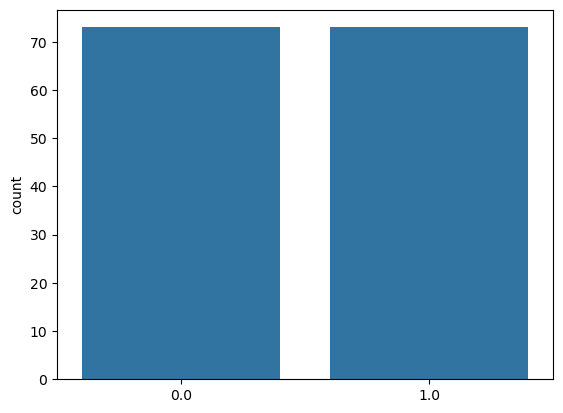

In [154]:
sns.countplot(x=y_test)

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:3]


array([[-0.99851866,  0.06382863,  0.03553072, -0.57508119, -0.95121182,
        -1.07744192,  0.15763631, -0.82970139],
       [-0.93628465,  0.49642119,  0.50885076, -0.57508119,  0.49357153,
         0.56098058,  0.69972278,  1.33306223],
       [ 0.27727859, -0.1957269 ,  0.82439745, -0.57508119,  0.01197708,
         1.10712141,  0.39679211, -0.82970139]])

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, fbeta_score, classification_report

# Create Decision Tree classifier
classifier = DecisionTreeClassifier()

# Fitting Decision Tree classification model to the training set
classifier.fit(X_train_scaled, y_train)

# Predicting the test set result
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F-beta score:', fbeta_score(y_test, y_pred, beta=1))
print('Classification report:', classification_report(y_test, y_pred))


Confusion Matrix: [[69  4]
 [ 5 68]]
Accuracy score: 0.9383561643835616
Precision score: 0.9444444444444444
Recall score: 0.9315068493150684
F-beta score: 0.9379310344827586
Classification report:               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        73
         1.0       0.94      0.93      0.94        73

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



In [157]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(200,200))
tree = plot_tree(
    decision_tree=classifier,
    feature_names=df.columns,
    class_names=['0', '1'],
    filled=True
)

print('Decision Tree')
# display(tree)
# plt.show(tree)
plt.savefig('Decision Tree.png')


Decision Tree
